# The Greatest Job Satisfaction Soiree
## Project 1 - Team 4

### Import Dependencies


In [2]:
# JW import all dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import gmplot
import gmaps
import os

# JW Import gmplot library
from gmplot import *

# JW Set maps API key
from config import api_key
gmaps.apikey = f'{api_key}'


In [3]:
# test map


gmap = gmplot.GoogleMapPlotter(38.88029, -99.320974, 14, apikey=gmap_apikey)

# Location where you want to save your file.
gmap.draw( "map11.html" )


In [4]:
# JW set file path for CSV

csv_file = "Resources/glassdoor_reviews.csv"

In [5]:
# JW Read in csv

csv_read = pd.read_csv(csv_file)
csv_read2 = pd.read_csv(csv_file)
print(csv_read.head())
print(csv_read2.head())

   Unnamed: 0  column_label       firm date_review  \
0           1             1  Sotheby-s  2021-05-25   
1           2             1  Sotheby-s  2021-05-25   
2           3             1  Sotheby-s  2021-05-24   
3           4             1  Sotheby-s  2021-05-22   
4           5             1  Sotheby-s  2021-05-15   

                         job_title                             current  \
0                Financial Analyst   Former Employee, more than 1 year   
1                    Administrator                     Former Employee   
2   Client Services Representative   Former Employee, more than 1 year   
3               Anonymous Employee                    Current Employee   
4                    Administrator  Current Employee, less than 1 year   

                   location  overall_rating  work_life_balance  \
0              New York, NY               1                1.0   
1                 Hong Kong               4                4.0   
2  London, England, England     

In [5]:
# JW Check column data types

csv_read.dtypes

Unnamed: 0               int64
column_label             int64
firm                    object
date_review             object
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion    float64
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
use                    float64
dtype: object

In [6]:
# csv_read.groupby('location')[['overall_rating', 'work_life_balance']].mean()

In [7]:
# view columm names
for col in csv_read:
    print(col)

Unnamed: 0
column_label
firm
date_review
job_title
current
location
overall_rating
work_life_balance
culture_values
diversity_inclusion
career_opp
comp_benefits
senior_mgmt
recommend
ceo_approv
outlook
headline
pros
cons
use


In [8]:
# clean data / delete columns
# keep firm, overall_rating, location, work_life_balance, recommend

csv_read.drop(['Unnamed: 0', 'column_label','date_review', 'job_title', 'current', 'culture_values', 'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt','ceo_approv','outlook','headline','pros','cons','use'], axis=1, inplace=True)


In [11]:
csv_read

,firm,location,overall_rating,work_life_balance,recommend
0,Sotheby-s,"New York, NY",1,1.0,x
1,Sotheby-s,Hong Kong,4,4.0,o
2,Sotheby-s,"London, England, England",4,5.0,v
3,Sotheby-s,Hong Kong,3,2.0,o
4,Sotheby-s,"London, England, England",4,4.0,v
...,...,...,...,...,...
838561,Department-for-Work-And-Pensions,"London, England, England",2,4.0,o
838562,Department-for-Work-And-Pensions,"London, England, England",3,5.0,o
838563,Department-for-Work-And-Pensions,"London, England, England",4,4.0,v
838564,Department-for-Work-And-Pensions,"Newport, Newport, Wales, Wales",4,5.0,v


In [12]:
# JW find average rating for all companies

average_rating = csv_read.groupby('location')[['overall_rating', 'work_life_balance']].mean()
average_rating

,overall_rating,work_life_balance
location,,
's-Hertogenbosch,4.50,3.5
A Coruña,4.75,4.0
"ASHBURTON, Canterbury",2.00,NaN
"Aa Junction, AR",4.00,NaN
Aalborg,4.00,3.0
...,...,...
‘Arab al Ma‘‘āzah,5.00,NaN
‘Asalūyeh,4.00,NaN
‘Asamah,4.00,3.0


In [13]:
# remove other firms
# csv_clean = csv_read.loc[(csv_read["firm"]== "Accenture") | (csv_read["firm"]== "the-LEGO-Group")]
# csv_clean

# csv_location = csv_clean[csv_clean['location'].notna()]
# csv_location

# split df into chosen companies

accenture_clean = csv_read.loc[(csv_read["firm"]== "Accenture")]
lego_clean = csv_read.loc[(csv_read["firm"]== "the-LEGO-Group")]


In [14]:
# JW find the mean ratings for each location

lego_mean = lego_clean.groupby('location')[['overall_rating', 'work_life_balance']].mean()
accenture_mean = accenture_clean.groupby('location')[['overall_rating', 'work_life_balance']].mean()

lego_mean.head()

,overall_rating,work_life_balance
location,,
Aarhus,4.0,3.0
Amsterdam,4.0,4.0
"Anaheim, CA",4.0,3.0
"Anchorage, AK",4.0,5.0
"Atlanta, GA",2.0,2.0


In [31]:
lego_mean = lego_mean.reset_index()
lego_mean

,level_0,index,location,overall_rating,work_life_balance
0,0,0,Aarhus,4.000000,3.0
1,1,1,Amsterdam,4.000000,4.0
2,2,2,"Anaheim, CA",4.000000,3.0
3,3,3,"Anchorage, AK",4.000000,5.0
4,4,4,"Atlanta, GA",2.000000,2.0
...,...,...,...,...,...
147,147,147,"Wijnegem, Antwerp",4.000000,5.0
148,148,148,"Windsor, South East England, England, England",3.666667,3.5
149,149,149,"Windsor, South West England, England, England",3.000000,2.0
150,150,150,"Woking, England, England",5.000000,4.0


<BarContainer object of 152 artists>

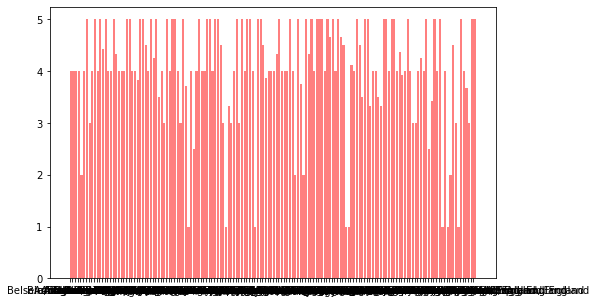

In [35]:
X = list(lego_mean.iloc[:, 0])
Y = list(lego_mean.iloc[:, 1])

plt.figure(figsize=(8,5))
plt.bar(lego_mean["location"], lego_mean["overall_rating"], color='r', alpha=0.5, align="edge")


In [ ]:
# find top 10

In [ ]:
# find bottom 10

In [ ]:
# # sort data by location
# csv_sorted = csv_location.groupby(["location"])
# csv_sorted.head()

In [ ]:
# csv_sorted.groupby('location')[['overall_rating', 'work_life_balance']].mean()

In [ ]:
#  # Figure out the minimum and maximum rating
# print(csv_sorted["overall_rating"].max())
# print(csv_sorted["overall_rating"].min())

In [ ]:
# print(csv_sorted['location'].unique())

In [ ]:
# location_list = csv_sorted['location'].unique()

In [ ]:
# location_list

In [ ]:
# # JW calculate the number of unique locations

# country_count = len(csv_sorted["location"].unique())
# country_count